In [453]:
import requests
import bs4
from bs4 import BeautifulSoup
import urllib2
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline

def group(iterator, count):
    itr = iter(iterator)
    while True:
        yield tuple([itr.next() for i in range(count)])


In [439]:
URL = "http://fftoday.com/stats/playerstats.php?Season=2015&GameWeek=Season&PosID=10&LeagueID=10"

In [440]:
#parse the page
soup = BeautifulSoup(requests.get(URL).text)


In [441]:
player_data = [[i for i in soup('table')[9].findAll('tr')[0]('tr')[i].text.split()[1:]] 
               for i in range(len(soup('table')[9].findAll('tr')[0]('tr')))]
columnNames = player_data[1][1:]

df = pd.DataFrame(player_data[2:],columns=columnNames)

df['First:'] = df[[0,1]].apply(lambda x: ' '.join(x),axis=1)

df.rename(columns={'First:': 'Player'}, inplace=True)

del df['Last:']

In [442]:
df.head()

,Player,Team,G,Comp,Att,Yard,TD,INT,Att,Yard,TD,FPts,FPts/G
0,Cam Newton,CAR,16,296,496,"3,837",35,10,132,636,10,455.5,28.5
1,Tom Brady,NE,16,402,624,"4,770",36,7,34,53,3,405.8,25.4
2,Blake Bortles,JAC,16,355,606,"4,428",35,18,52,310,2,404.4,25.3
3,Russell Wilson,SEA,16,329,483,"4,022",34,8,103,554,1,398.5,24.9
4,Carson Palmer,ARI,16,342,538,"4,671",35,11,25,24,1,382.0,23.9


In [443]:
#scraping the QB page
soupQB = BeautifulSoup(requests.get('https://www.fantasypros.com/nfl/projections/qb.php?year=2015&week=draft').text)

data_QB = soupQB('table')[1].findAll('tbody')[0].text.strip().split()

teamList = ['NE','NYJ','MIA','BUF','PIT','BAL','CLE','CIN','HOU','IND',
            'JAC','TEN','DEN','KC','SD','OAK','DAL','WAS','NYG','PHI',
            'MIN','GB','DET','CHI','NO','TB','ATL','CAR','SF','SEA','ARI','STL','LA']

data_QB_noTeam = [i for i in data_QB if i not in teamList]

dfQB = pd.DataFrame(list(group(data_QB_noTeam, 12)))

dfQB[0] = dfQB[[0,1]].apply(lambda x: ' '.join(x),axis=1)

del dfQB[1]
dfQB.insert(1, 'Position', 'QB')
column_QB = ['Player','Postion','Pass_Attempt','Pass_Completion','Pass_Yards','Pass_Touchdowns','Interceptions',
                 'Rush_Attempt','Rush_Yards','Rush_Touchdowns','Fumbles_Lost','Fantasy_Points']

#del dfExpert[2]

dfQB.columns = column_QB


In [444]:
#scraping the RB page
soupRB = BeautifulSoup(requests.get('https://www.fantasypros.com/nfl/projections/rb.php?year=2015&week=draft').text)

data_RB = soupRB('table')[1].findAll('tbody')[0].text.strip().split()

data_RB_noTeam = [i for i in data_RB if i not in teamList]

dfRB = pd.DataFrame(list(group(data_RB_noTeam, 10)))

dfRB[0] = dfRB[[0,1]].apply(lambda x: ' '.join(x),axis=1)

del dfRB[1]
dfRB.insert(1, 'Position', 'RB')

column_RB = ['Player','Postion','Rush_Attempt','Rush_Yards','Rush_Touchdowns','Rec','Receive_Yards','Receive_Touchdowns',
             'Fumbles_Lost','Fantasy_Points']

#del dfExpert[2]

dfRB.columns = column_RB

dfRB.head()

#write a data dictionary: ordinal, interval, ratio, discrete, float, integer, 

,Player,Postion,Rush_Attempt,Rush_Yards,Rush_Touchdowns,Rec,Receive_Yards,Receive_Touchdowns,Fumbles_Lost,Fantasy_Points
0,Marshawn Lynch,RB,288.8,"1,357.1",10.0,38.3,337.2,2.4,2.4,238.6
1,Jamaal Charles,RB,233.8,"1,135.9",9.5,51.7,433.0,4.8,2.6,237.6
2,Eddie Lacy,RB,281.1,"1,266.4",9.8,46.3,385.3,2.2,2.4,232.3
3,Adrian Peterson,RB,283.5,"1,323.3",9.9,41.5,299.5,1.5,2.1,226.2
4,Le'Veon Bell,RB,237.4,"1,057.0",7.4,65.8,569.6,2.4,1.2,218.9


In [445]:
#scraping the RB page
soupWR = BeautifulSoup(requests.get('https://www.fantasypros.com/nfl/projections/wr.php?year=2015&week=draft').text)

data_WR = soupWR('table')[1].findAll('tbody')[0].text.strip().split()

data_WR_noTeam = [i for i in data_WR if i not in teamList]

dfWR = pd.DataFrame(list(group(data_WR_noTeam, 10)))

dfWR[0] = dfWR[[0,1]].apply(lambda x: ' '.join(x),axis=1)

del dfWR[1]
dfWR.insert(1, 'Position', 'WR')

column_WR = ['Player','Postion','Rush_Attempt','Rush_Yards','Rush_Touchdowns','Rec','Receive_Yards','Receive_Touchdowns',
             'Fumbles_Lost','Fantasy_Points']

#del dfExpert[2]

dfWR.columns = column_WR

dfWR.head()

#write a data dictionary: ordinal, interval, ratio, discrete, float, integer, 

,Player,Postion,Rush_Attempt,Rush_Yards,Rush_Touchdowns,Rec,Receive_Yards,Receive_Touchdowns,Fumbles_Lost,Fantasy_Points
0,Antonio Brown,WR,4.8,23.2,0.0,116.8,"1,538.5",10.0,1.8,212.6
1,Demaryius Thomas,WR,0.0,0.0,0.0,102.4,"1,414.5",11.6,0.3,210.2
2,Dez Bryant,WR,0.1,0.5,0.0,89.8,"1,330.2",11.9,0.4,203.4
3,Odell Beckham,WR,Jr.,4.1,28.1,0.0,101.8,"1,394.0",10.5,1.6
4,202.3 Julio,WR,Jones,1.7,9.2,0.0,102.7,"1,430.1",8.4,0.9


In [446]:
#scraping the RB page
soupTE = BeautifulSoup(requests.get('https://www.fantasypros.com/nfl/projections/te.php?year=2015&week=draft').text)

data_TE = soupTE('table')[1].findAll('tbody')[0].text.strip().split()

data_TE_noTeam = [i for i in data_TE if i not in teamList]

dfTE = pd.DataFrame(list(group(data_TE_noTeam, 7)))

dfTE[0] = dfTE[[0,1]].apply(lambda x: ' '.join(x),axis=1)

del dfTE[1]

dfTE.insert(1, 'Position', 'TE')

column_TE = ['Player','Postion','Rec','Receive_Yards','Receive_Touchdowns','Fumbles_Lost','Fantasy_Points']

dfTE.columns = column_TE

dfTE.head()

#write a data dictionary: ordinal, interval, ratio, discrete, float, integer, 

,Player,Postion,Rec,Receive_Yards,Receive_Touchdowns,Fumbles_Lost,Fantasy_Points
0,Rob Gronkowski,TE,83.0,"1,101.3",10.2,0.2,171.2
1,Jimmy Graham,TE,70.4,860.7,8.8,1.4,136.1
2,Greg Olsen,TE,78.0,926.5,5.6,0.4,125.4
3,Travis Kelce,TE,72.4,851.9,6.2,2.4,117.3
4,Martellus Bennett,TE,78.8,827.9,5.3,0.3,114.2


In [447]:
#scraping the RB page
soupK = BeautifulSoup(requests.get('https://www.fantasypros.com/nfl/projections/k.php?year=2015&week=draft').text)

data_K = soupK('table')[1].findAll('tbody')[0].text.strip().split()

data_K_noTeam = [i for i in data_K if i not in teamList]

dfK = pd.DataFrame(list(group(data_K_noTeam, 6)))

dfK[0] = dfK[[0,1]].apply(lambda x: ' '.join(x),axis=1)

del dfK[1]

dfK.insert(1, 'Position', 'K')

column_K = ['Player','Postion','FGM','FGA','Fumbles_Lost','Fantasy_Points']

dfK.columns = column_K

dfK.head()

#write a data dictionary: ordinal, interval, ratio, discrete, float, integer, 

,Player,Postion,FGM,FGA,Fumbles_Lost,Fantasy_Points
0,Stephen Gostkowski,K,31.6,34.5,45.1,139.9
1,Mason Crosby,K,27.8,33.3,47.4,130.8
2,Adam Vinatieri,K,28.7,31.8,43.5,129.6
3,Cody Parkey,K,28.8,33.0,43.1,129.6
4,Justin Tucker,K,29.8,33.6,39.0,128.3


In [448]:
soup_results = BeautifulSoup(requests.get('https://www.fantasypros.com/nfl/reports/leaders/').text)

data_results = [i.text for i in soup_results('table')[0].findAll('td')]

column_results = ['Rank','Player', 'Team','Position','Total_Points','Games_Played','Avg_Points']
dfResults = pd.DataFrame(list(group(data_results,7)),columns=column_results)
dfResults.head(20)

,Rank,Player,Team,Position,Total_Points,Games_Played,Avg_Points
0,1,Cam Newton,CAR,QB,389.1,16,24.3
1,2,Tom Brady,NE,QB,343.7,16,21.5
2,3,Russell Wilson,SEA,QB,336.4,16,21.0
3,4,Blake Bortles,JAC,QB,316.1,16,19.8
4,5,Carson Palmer,ARI,QB,309.2,16,19.3
5,6,Drew Brees,NO,QB,306.5,15,20.4
6,7,Aaron Rodgers,GB,QB,301.3,16,18.8
7,8,Kirk Cousins,WAS,QB,293.5,16,18.3
8,9,Matthew Stafford,DET,QB,289.7,16,18.1
9,10,Eli Manning,NYG,QB,287.6,16,18.0


In [449]:
#!brew install postgresql
#!brew services stop postgresql
#!brew services start postgresql
#!createdb fantasyfootball


In [450]:
engine = create_engine('postgresql://:@localhost:5432/fantasyfootball')

dfQB.columns = [c.lower() for c in dfQB.columns]
dfRB.columns = [c.lower() for c in dfRB.columns]
dfWR.columns = [c.lower() for c in dfWR.columns]
dfTE.columns = [c.lower() for c in dfTE.columns]
dfK.columns = [c.lower() for c in dfK.columns]
dfResults.columns = [c.lower() for c in dfResults.columns]

#dfQB.to_sql("qb", engine)
#dfRB.to_sql("rb", engine)
#dfWR.to_sql("wr", engine)
#dfTE.to_sql("te", engine)
#dfK.to_sql("k", engine)
#dfResults.to_sql('results',engine)

connection = engine.connect()

joinedQB = pd.read_sql("""
                        SELECT results.player,results.team,qb.fantasy_points
                        FROM results
                        JOIN qb 
                        ON results.player=qb.player
                        ;""",con=engine)

joinedRB = pd.read_sql("""
                        SELECT results.player,results.team,rb.fantasy_points
                        FROM results
                        JOIN rb 
                        ON results.player=rb.player
                        ;""",con=engine)

joinedWR = pd.read_sql("""
                        SELECT results.player,results.team,wr.fantasy_points
                        FROM results
                        JOIN wr 
                        ON results.player=wr.player
                        ;""",con=engine)

joinedTE = pd.read_sql("""
                        SELECT results.player,results.team,te.fantasy_points
                        FROM results
                        JOIN te 
                        ON results.player=te.player
                        ;""",con=engine)

joinedK = pd.read_sql("""
                        SELECT results.player,results.team,k.fantasy_points
                        FROM results
                        JOIN k 
                        ON results.player=k.player
                        ;""",con=engine)

frames = [joinedQB, joinedRB, joinedWR, joinedTE, joinedK]

finalFrame = pd.concat(frames)
finalFrame.head()

,player,team,fantasy_points
0,Cam Newton,CAR,278.9
1,Tom Brady,NE,281.2
2,Russell Wilson,SEA,303.2
3,Blake Bortles,JAC,205.5
4,Carson Palmer,ARI,232.8


In [451]:
somethingNew = (dfResults.loc[dfResults['player'].isin(finalFrame['player'])])
somethingNew = somethingNew.drop_duplicates(['player'],keep='last')

somethingWeird = (finalFrame.loc[finalFrame['player'].isin(dfResults['player'])])
somethingWeird = somethingWeird.drop_duplicates(['player'], keep='last')
somethingWeird['fantasy_points'] = somethingWeird['fantasy_points'].astype(float)

newDF = pd.merge(somethingNew, somethingWeird, on='player')
newDF.drop(['rank','avg_points','team_y'],axis=1,inplace=True)
newDF = newDF[['player','team_x','position','games_played','total_points','fantasy_points']]
newDF = newDF.rename(index=str, columns={"team_x": "team", "total_points": "actual","fantasy_points":"projected"})

newDF.head()

,player,team,position,games_played,actual,projected
0,Cam Newton,CAR,QB,16,389.1,278.9
1,Tom Brady,NE,QB,16,343.7,281.2
2,Russell Wilson,SEA,QB,16,336.4,303.2
3,Blake Bortles,JAC,QB,16,316.1,205.5
4,Carson Palmer,ARI,QB,16,309.2,232.8


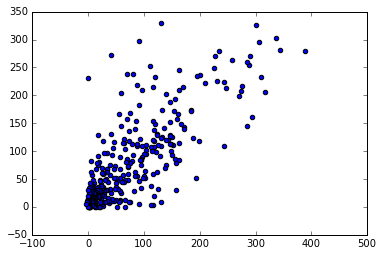

In [469]:
plt.scatter(newDF.actual.tolist(),newDF.projected.tolist())

In [464]:
newDF.projected

0      278.9
1      281.2
2      303.2
3      205.5
4      232.8
5      295.6
6      325.2
7      160.9
8      271.3
9      254.0
10     144.8
11     258.8
12     216.4
13     207.5
14     199.2
15     262.7
16     212.6
17     223.3
18     109.3
19     278.8
20     226.2
21     270.3
22     249.1
23     221.5
24     236.6
25     117.3
26     235.0
27      51.3
28     123.6
29     173.2
       ...  
301      4.9
302      2.6
303     21.6
304     18.7
305     25.2
306     16.7
307      7.2
308      0.0
309     13.4
310      0.0
311     33.9
312      0.1
313     10.3
314     14.3
315      2.6
316     13.8
317      8.5
318      8.6
319    230.7
320     10.3
321     30.1
322     20.1
323      5.7
324      5.8
325      0.0
326      8.7
327     11.1
328     10.4
329      8.1
330      4.7
Name: projected, dtype: float64